In [1]:
import numpy as np
import pandas as pd

Today we will cover:
    - Data Wragling:
        - joining:
            -left_on
            -right_on
            - left_index_on
            - right_index_on
            - how(left, right, inner, outer)
    - Group by
    - Handling missing data

In [38]:
# data wrangling require github frame
df1 = pd.DataFrame({
    "CNIC": np.random.randint(1, 20, size=(20)),
    "Account Num": np.random.randint(1, 5, size=(20))
})
df1.head()

,CNIC,Account Num
0,7,4
1,6,2
2,15,3
3,2,3
4,3,3


In [39]:
df2 = pd.DataFrame({
    "CNIC": np.random.randint(1, 20, size=(20)),
    "Account Num": np.random.randint(1, 5, size=(20)),
    "Mobile Num": np.random.randint(2001, 3000, size=(20)),
    "Date": pd.date_range('1990-01-01', periods=20),
    "CustomerName": [chr(x) for x in np.random.randint(65, 91, size=(20))],
    'Gender': np.random.choice(['M', 'F'], size=20),
})
df2.head()

,CNIC,Account Num,Mobile Num,Date,CustomerName,Gender
0,11,1,2757,1990-01-01,C,F
1,17,3,2399,1990-01-02,V,F
2,13,4,2876,1990-01-03,D,F
3,19,4,2069,1990-01-04,X,M
4,11,1,2227,1990-01-05,P,M


In [8]:
[chr(x) for x in np.random.randint(65, 91, size=(20))]

['X',
 'O',
 'W',
 'T',
 'A',
 'O',
 'L',
 'D',
 'F',
 'C',
 'R',
 'C',
 'D',
 'U',
 'Y',
 'E',
 'H',
 'W',
 'A',
 'I']

In [ ]:
# for comparison of two columns their datatypes should be same

In [28]:
print(df1.dtypes, df2.dtypes, sep='\n\n')

CNIC           int32
Account Num    int32
dtype: object

CNIC                     int32
Account Num              int32
Mobile Num               int32
Date            datetime64[ns]
CustomerName            object
Gender                  object
dtype: object


In [33]:
for c in df2.columns[:2]:
    print(c, len(df2[c].unique()))

CNIC 10
Account Num 20


In [34]:
# left dataframe(right df), on[column name same in both]
a = df1.merge(df2, on=['CNIC'], how='inner')
# inner means same in both
a.head()

,CNIC,Account Num_x,Account Num_y,Mobile Num,Date,CustomerName,Gender
0,13,1504,1066,2539,1990-01-05,N,M
1,13,1504,1639,2872,1990-01-15,J,M
2,13,1504,1809,2600,1990-01-16,H,M
3,13,1042,1066,2539,1990-01-05,N,M
4,13,1042,1639,2872,1990-01-15,J,M


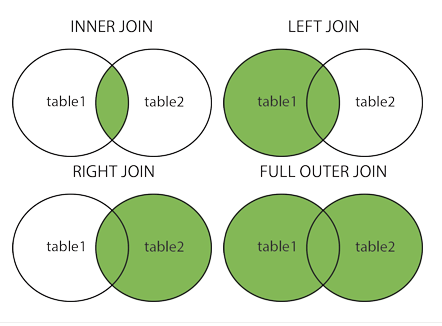

In [24]:
from IPython.display import Image
Image("sqljoin.png")

In [26]:
np.random.choice(['M', 'F'], size=20)

array(['M', 'F', 'M', 'F', 'M', 'M', 'F', 'M', 'F', 'F', 'M', 'F', 'M',
       'F', 'F', 'F', 'F', 'M', 'F', 'F'], dtype='<U1')

In [40]:
a = df1.merge(df2, on=['CNIC', 'Account Num'], how='inner')
a.head()

,CNIC,Account Num,Mobile Num,Date,CustomerName,Gender
0,2,3,2881,1990-01-19,Z,F
1,7,2,2710,1990-01-10,X,F
2,11,1,2757,1990-01-01,C,F
3,11,1,2227,1990-01-05,P,M
4,15,2,2763,1990-01-14,Q,M


In [41]:
a = df1.merge(df2, on=['CNIC', 'Account Num'], how='left')
a.head()

,CNIC,Account Num,Mobile Num,Date,CustomerName,Gender
0,7,4,NaN,NaT,NaN,NaN
1,6,2,NaN,NaT,NaN,NaN
2,15,3,NaN,NaT,NaN,NaN
3,2,3,2881.0,1990-01-19,Z,F
4,3,3,NaN,NaT,NaN,NaN


In [43]:
df1.drop_duplicates(['CNIC', 'Account Num']).head()

,CNIC,Account Num
0,7,4
1,6,2
2,15,3
3,2,3
4,3,3


In [44]:
# LEFT_ON, RIGHT_ON
df1 = pd.DataFrame({
    "Customer NIC": np.random.randint(1, 20, size=(20)),
    "Customer Account": np.random.randint(1, 5, size=(20))
})

df2 = pd.DataFrame({
    "CNIC": np.random.randint(1, 20, size=(20)),
    "Account Num": np.random.randint(1, 5, size=(20)),
    "Mobile Num": np.random.randint(2001, 3000, size=(20)),
    "Date": pd.date_range('1990-01-01', periods=20),
    "CustomerName": [chr(x) for x in np.random.randint(65, 91, size=(20))],
    'Gender': np.random.choice(['M', 'F'], size=20),
})
# join wih different columns name in both table
df1.merge(df2, left_on=['Customer NIC', 'Customer Account'], right_on=['CNIC', 'Account Num'], how='outer')

,Customer NIC,Customer Account,CNIC,Account Num,Mobile Num,Date,CustomerName,Gender
0,14.0,2.0,NaN,NaN,NaN,NaT,NaN,NaN
1,1.0,3.0,NaN,NaN,NaN,NaT,NaN,NaN
2,5.0,1.0,5.0,1.0,2679.0,1990-01-06,I,F
3,5.0,1.0,5.0,1.0,2690.0,1990-01-18,R,M
4,4.0,2.0,NaN,NaN,NaN,NaT,NaN,NaN
5,14.0,4.0,NaN,NaN,NaN,NaT,NaN,NaN
6,16.0,4.0,NaN,NaN,NaN,NaT,NaN,NaN
7,19.0,2.0,NaN,NaN,NaN,NaT,NaN,NaN
8,19.0,2.0,NaN,NaN,NaN,NaT,NaN,NaN
9,10.0,2.0,NaN,NaN,NaN,NaT,NaN,NaN


In [56]:
customers = pd.DataFrame({
    "Customer NIC": [14, 6, 19],
    'Customer Name': ['A', 'B', 'C']
})

transactions = pd.DataFrame({
    "CNIC": np.random.choice([14, 6, 19, 21, 20], size=(20)),
    "Transaction ID": np.random.randint(1, 5, size=(20)),
    "Transaction Date": pd.date_range('1990-01-01', periods=20),
    'Description': np.random.choice(['M', 'F'], size=20),
})
print(customers, transactions.head(), sep='\n\n')

   Customer NIC Customer Name
0            14             A
1             6             B
2            19             C

   CNIC  Transaction ID Transaction Date Description
0    14               2       1990-01-01           M
1    21               2       1990-01-02           M
2    20               1       1990-01-03           M
3    20               1       1990-01-04           M
4    19               1       1990-01-05           M


In [58]:
c = pd.DataFrame(transactions.CNIC.value_counts())
c.columns = ['Tr Counts']
c

,Tr Counts
20,5
6,5
19,4
21,3
14,3


In [61]:
customers.merge(c, left_on='Customer NIC', right_index=True, how='left')

,Customer NIC,Customer Name,Tr Counts
0,14,A,3
1,6,B,5
2,19,C,4


In [67]:
df1 = pd.DataFrame({
    "CNIC": np.random.randint(1, 20, size=(20)),
    "Account Num": np.random.randint(1, 5, size=(20))
})

df2 = pd.DataFrame({
    "CNIC": np.random.randint(1, 20, size=(20)),
    "Account Num": np.random.randint(1, 5, size=(20)),
    "Mobile Num": np.random.randint(2001, 3000, size=(20)),
    "Date": pd.date_range('1990-01-01', periods=20),
    "CustomerName": [chr(x) for x in np.random.randint(65, 91, size=(20))],
    'Gender': np.random.choice(['M', 'F'], size=20),
})
#df1.join(c, on=['CNIC', 'Account Num'], how='left', rsuffix=)
pd.merge(df1, df2, on=['CNIC', 'Account Num'], how='left')

,CNIC,Account Num,Mobile Num,Date,CustomerName,Gender
0,2,2,2332.0,1990-01-04,T,F
1,18,3,NaN,NaT,NaN,NaN
2,18,1,NaN,NaT,NaN,NaN
3,12,4,NaN,NaT,NaN,NaN
4,3,2,NaN,NaT,NaN,NaN
5,14,1,NaN,NaT,NaN,NaN
6,10,4,NaN,NaT,NaN,NaN
7,5,4,NaN,NaT,NaN,NaN
8,4,3,NaN,NaT,NaN,NaN
9,2,4,NaN,NaT,NaN,NaN


In [68]:
df1.join(c, on=['CNIC', 'Account Num'], how='left', rsuffix='left')

ValueError: len(left_on) must equal the number of levels in the index of "right"

In [73]:
df1 = pd.DataFrame({
    'NIC': [1, 3, 4],
    'A': [1, 3, 23]
})

df2 = pd.DataFrame({
    'NIC': [1, 2, 3],
    'A': [1, 3, 23]
})

df3 = pd.DataFrame({
    'NIC': [1, 4, 7],
    'A': [1, 3, 23]
})

df = df1.merge(df2, on='NIC', how='left')
df

,NIC,A_x,A_y
0,1,1,1.0
1,3,3,23.0
2,4,23,NaN


In [75]:
df = df1.merge(df2, on='NIC', how='left').merge(df3, on='NIC', how='left')
df

,NIC,A_x,A_y,A
0,1,1,1.0,1.0
1,3,3,23.0,NaN
2,4,23,NaN,3.0


- Group by
- unstack
- reset_index()
- pivot_table()

In [76]:
# pivot_table
df2

,NIC,A
0,1,1
1,2,3
2,3,23


In [80]:
df2 = pd.DataFrame({
    "CNIC": np.random.randint(1, 20, size=(20)),
    "Account Num": np.random.randint(1, 5, size=(20)),
    "Mobile Num": np.random.randint(2001, 3000, size=(20)),
    "Date": pd.date_range('1990-01-01', periods=20),
    "CustomerName": [chr(x) for x in np.random.randint(65, 91, size=(20))],
    'Gender': np.random.choice(['M', 'F'], size=20),
})
df2

,CNIC,Account Num,Mobile Num,Date,CustomerName,Gender
0,6,4,2118,1990-01-01,Z,F
1,14,2,2995,1990-01-02,S,F
2,11,4,2917,1990-01-03,E,F
3,7,3,2005,1990-01-04,K,F
4,17,4,2355,1990-01-05,K,M
5,4,1,2224,1990-01-06,K,M
6,14,4,2919,1990-01-07,J,F
7,8,3,2565,1990-01-08,U,M
8,5,2,2602,1990-01-09,C,M
9,15,4,2482,1990-01-10,F,M


In [84]:
df2.groupby(by=['Gender']).agg(['count'])

,CNIC,Account Num,Mobile Num,Date,CustomerName
,count,count,count,count,count
Gender,,,,,
F,13,13,13,13,13
M,7,7,7,7,7
